In [1]:
from random import randint

# generate a sequence of random integers
def generate_sequence(length, n_unique):
    return [randint(0, n_unique-1) for _ in range(length)]

# generate random sequence
sequence = generate_sequence(5, 50)
print(sequence)

[12, 20, 7, 11, 14]


In [3]:
# one hot encode sequence
def one_hot_encode(sequence, n_unique):
    encoding = list()
    for value in sequence:
        vector = [0 for _ in range(n_unique)]
        vector[value] = 1
        encoding.append(vector)
    return array(encoding)

In [4]:
# decode a one hot encoded string
def one_hot_decode(encoded_seq):
    return [argmax(vector) for vector in encoded_seq]

In [478]:
import numpy as np
# prepare data for the LSTM
def get_pair(n_in, n_out, cardinality):
    # generate random sequence
    sequence_in = generate_sequence(n_in, cardinality)
    sequence_out = sequence_in[:n_out] + [0 for _ in range(n_in-n_out)]
    # one hot encode
    #X = one_hot_encode(sequence_in, cardinality)
    #y = one_hot_encode(sequence_out, cardinality)
    # reshape as 3D
    #X = X.reshape((1, X.shape[0], X.shape[1]))
    #y = y.reshape((1, y.shape[0], y.shape[1]))
    return np.array(sequence_in).reshape(1, 5, 1), np.array(sequence_out).reshape(1, 5, 1)


def get_pair(periods=20):
    # generate random sequence
    start = np.random.randint(0, 100)
    
    sequence_in = np.sin(np.linspace(start, start + 2*np.pi, periods))
    sequence_out = 2*np.cos(0.25*np.linspace(start, start + 2*np.pi, periods)) + 2*np.cos(np.linspace(start, start + 2*np.pi, periods)) - 0.2 *np.linspace(0, periods, periods) + np.exp(0.1 *np.linspace(0, periods, periods))
    # one hot encode
    #X = one_hot_encode(sequence_in, cardinality)
    #y = one_hot_encode(sequence_out, cardinality)
    # reshape as 3D
    #X = X.reshape((1, X.shape[0], X.shape[1]))
    #y = y.reshape((1, y.shape[0], y.shape[1]))
    return np.array(sequence_in).reshape(1, periods, 1), np.array(sequence_out).reshape(1, periods, 1)


In [479]:
one_hot_decode(X[0])
one_hot_decode(y[0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [510]:
X.shape

(1, 20, 1)

In [481]:
X,y = get_pair(n_timesteps_in, n_timesteps_out, 10)
y-X

TypeError: get_pair() takes from 0 to 1 positional arguments but 3 were given

In [482]:
from random import randint
from numpy import array
from numpy import argmax
from numpy import array_equal
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import RepeatVector

In [483]:
# configure problem
n_features = 1
n_timesteps_in = 20
n_timesteps_out = 2
# define model
model = Sequential()
model.add(LSTM(150, input_shape=(n_timesteps_in, n_features)))
model.add(RepeatVector(n_timesteps_in))
model.add(LSTM(150, return_sequences=True))
model.add(TimeDistributed(Dense(n_features, activation='linear')))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])

In [484]:
X.shape

(1, 20, 1)

In [485]:
y.shape

(1, 20, 1)

In [486]:
X[0, 0]

array([ 0.74511316])

In [502]:
# train LSTM
for epoch in range(1000):
    if epoch%20==0:
        print(epoch)
    # generate new random sequence
    X,y = get_pair(20)
    # fit model for one epoch on this sequence
    model.fit(X, y, epochs=2, verbose=1)
# evaluate LSTM
total, correct = 100, 0

0
Epoch 1/2
1/1 [==============================] - 0s 34ms/step - loss: 4.1179 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 35ms/step - loss: 3.7635 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 31ms/step - loss: 3.1974 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 31ms/step - loss: 2.5838 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 31ms/step - loss: 2.2735 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 29ms/step - loss: 2.2081 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 30ms/step - loss: 2.0642 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 34ms/step - loss: 2.0429 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 34ms/step - loss: 6.5870 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 30ms/step - loss: 6.1487 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] -

Epoch 2/2
1/1 [==============================] - 0s 32ms/step - loss: 3.0655 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 28ms/step - loss: 2.5164 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 27ms/step - loss: 2.5141 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 28ms/step - loss: 2.8127 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 28ms/step - loss: 2.7377 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 34ms/step - loss: 3.5819 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 35ms/step - loss: 3.4239 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 37ms/step - loss: 6.4311 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 35ms/step - loss: 6.3115 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 33ms/step - loss: 1.4860 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0

Epoch 1/2
1/1 [==============================] - 0s 35ms/step - loss: 2.4663 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 34ms/step - loss: 2.4422 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 33ms/step - loss: 2.9857 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 31ms/step - loss: 2.8292 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 31ms/step - loss: 3.0238 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 32ms/step - loss: 2.9722 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 34ms/step - loss: 2.2795 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 35ms/step - loss: 2.3370 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 34ms/step - loss: 1.7276 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 29ms/step - loss: 1.6712 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0

Epoch 2/2
1/1 [==============================] - 0s 37ms/step - loss: 1.2971 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 34ms/step - loss: 2.0871 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 33ms/step - loss: 2.2038 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 36ms/step - loss: 3.4706 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 33ms/step - loss: 3.3455 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 31ms/step - loss: 1.2386 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 29ms/step - loss: 1.2414 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 28ms/step - loss: 1.2047 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 32ms/step - loss: 1.2166 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 33ms/step - loss: 2.1049 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0

Epoch 1/2
1/1 [==============================] - 0s 35ms/step - loss: 2.6961 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 34ms/step - loss: 2.6229 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 33ms/step - loss: 2.3872 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 28ms/step - loss: 2.3119 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 30ms/step - loss: 2.8609 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 29ms/step - loss: 2.5243 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 31ms/step - loss: 3.2944 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 32ms/step - loss: 3.5806 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 37ms/step - loss: 2.4237 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 37ms/step - loss: 2.4233 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0

Epoch 2/2
1/1 [==============================] - 0s 35ms/step - loss: 1.6102 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 33ms/step - loss: 2.1453 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 34ms/step - loss: 2.0097 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 32ms/step - loss: 2.0461 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 30ms/step - loss: 2.1198 - acc: 0.0000e+00
220
Epoch 1/2
1/1 [==============================] - 0s 29ms/step - loss: 1.0739 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 34ms/step - loss: 1.0529 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 35ms/step - loss: 1.6419 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 35ms/step - loss: 1.5063 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 32ms/step - loss: 2.2442 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================]

Epoch 1/2
1/1 [==============================] - 0s 38ms/step - loss: 1.1581 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 37ms/step - loss: 1.1633 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 35ms/step - loss: 3.7265 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 40ms/step - loss: 3.7511 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 33ms/step - loss: 3.7328 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 30ms/step - loss: 3.6772 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 29ms/step - loss: 2.6893 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 37ms/step - loss: 2.7119 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 44ms/step - loss: 0.8000 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 40ms/step - loss: 0.7557 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0

Epoch 2/2
1/1 [==============================] - 0s 34ms/step - loss: 2.1374 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 34ms/step - loss: 1.2485 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 33ms/step - loss: 1.1738 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 33ms/step - loss: 2.1480 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 29ms/step - loss: 1.9650 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 34ms/step - loss: 2.9573 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 36ms/step - loss: 3.0716 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 37ms/step - loss: 0.9587 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 36ms/step - loss: 0.9891 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 33ms/step - loss: 0.6379 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0

Epoch 1/2
1/1 [==============================] - 0s 33ms/step - loss: 1.6449 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 34ms/step - loss: 1.6675 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 35ms/step - loss: 2.3573 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 33ms/step - loss: 2.3141 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 33ms/step - loss: 4.0058 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 32ms/step - loss: 3.9861 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 32ms/step - loss: 4.0325 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 33ms/step - loss: 3.8010 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 32ms/step - loss: 1.8932 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 32ms/step - loss: 1.7807 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0

Epoch 2/2
1/1 [==============================] - 0s 27ms/step - loss: 3.8879 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 26ms/step - loss: 2.0232 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 28ms/step - loss: 2.0381 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 26ms/step - loss: 2.1158 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 26ms/step - loss: 2.0896 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 25ms/step - loss: 1.2797 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 26ms/step - loss: 1.2611 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 26ms/step - loss: 2.9354 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 27ms/step - loss: 2.9448 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 26ms/step - loss: 0.8222 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0

Epoch 1/2
1/1 [==============================] - 0s 27ms/step - loss: 2.4106 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 29ms/step - loss: 2.3970 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 28ms/step - loss: 1.5884 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 27ms/step - loss: 1.5679 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 26ms/step - loss: 0.6597 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 27ms/step - loss: 0.6610 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 26ms/step - loss: 3.1980 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 28ms/step - loss: 2.8702 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 26ms/step - loss: 1.4586 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 28ms/step - loss: 1.4351 - acc: 0.0000e+00
440
Epoch 1/2
1/1 [==============================]

Epoch 2/2
1/1 [==============================] - 0s 26ms/step - loss: 2.5994 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 27ms/step - loss: 4.1790 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 26ms/step - loss: 4.1604 - acc: 0.0000e+00
480
Epoch 1/2
1/1 [==============================] - 0s 27ms/step - loss: 2.7033 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 26ms/step - loss: 2.6486 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 26ms/step - loss: 2.1995 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 27ms/step - loss: 2.1717 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 27ms/step - loss: 6.1416 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 26ms/step - loss: 5.9671 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 26ms/step - loss: 0.4555 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================]

Epoch 1/2
1/1 [==============================] - 0s 25ms/step - loss: 1.9647 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 26ms/step - loss: 1.9808 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 28ms/step - loss: 2.3825 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 25ms/step - loss: 2.3814 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 26ms/step - loss: 1.0650 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 25ms/step - loss: 1.0511 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 26ms/step - loss: 1.6658 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 26ms/step - loss: 1.6270 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 25ms/step - loss: 3.9292 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 25ms/step - loss: 3.8816 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0

Epoch 2/2
1/1 [==============================] - 0s 27ms/step - loss: 1.3695 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 25ms/step - loss: 6.4717 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 26ms/step - loss: 6.1762 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 27ms/step - loss: 6.7681 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 27ms/step - loss: 6.1635 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 27ms/step - loss: 4.3477 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 28ms/step - loss: 4.0309 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 27ms/step - loss: 1.1509 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 31ms/step - loss: 1.1753 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 34ms/step - loss: 2.9331 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0

Epoch 1/2
1/1 [==============================] - 0s 26ms/step - loss: 0.9215 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 28ms/step - loss: 0.9077 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 29ms/step - loss: 2.2252 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 27ms/step - loss: 2.1549 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 26ms/step - loss: 2.7295 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 28ms/step - loss: 2.5945 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 26ms/step - loss: 1.2758 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 26ms/step - loss: 1.2582 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 28ms/step - loss: 0.3707 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 28ms/step - loss: 0.3556 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0

Epoch 2/2
1/1 [==============================] - 0s 27ms/step - loss: 3.8351 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 28ms/step - loss: 1.7245 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 27ms/step - loss: 1.7234 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 28ms/step - loss: 2.6779 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 28ms/step - loss: 2.6175 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 26ms/step - loss: 1.6479 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 27ms/step - loss: 1.6000 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 28ms/step - loss: 2.8065 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 27ms/step - loss: 2.8226 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 27ms/step - loss: 1.6448 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0

Epoch 1/2
1/1 [==============================] - 0s 27ms/step - loss: 3.1771 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 27ms/step - loss: 3.2107 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 26ms/step - loss: 2.8914 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 27ms/step - loss: 2.8920 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 27ms/step - loss: 3.4157 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 28ms/step - loss: 3.3529 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 25ms/step - loss: 1.8144 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 24ms/step - loss: 1.7763 - acc: 0.0000e+00
700
Epoch 1/2
1/1 [==============================] - 0s 26ms/step - loss: 3.0840 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 26ms/step - loss: 3.0753 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================]

Epoch 2/2
1/1 [==============================] - 0s 28ms/step - loss: 3.7657 - acc: 0.0000e+00
740
Epoch 1/2
1/1 [==============================] - 0s 28ms/step - loss: 1.3928 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 27ms/step - loss: 1.2355 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 27ms/step - loss: 1.1781 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 27ms/step - loss: 1.0855 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 27ms/step - loss: 2.8938 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 27ms/step - loss: 2.7310 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 27ms/step - loss: 2.5429 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 27ms/step - loss: 2.5216 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 26ms/step - loss: 2.3038 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================]

Epoch 1/2
1/1 [==============================] - 0s 26ms/step - loss: 2.8020 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 28ms/step - loss: 2.7823 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 27ms/step - loss: 1.9578 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 28ms/step - loss: 1.9256 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 27ms/step - loss: 2.4674 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 27ms/step - loss: 2.4751 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 28ms/step - loss: 1.9064 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 28ms/step - loss: 1.8880 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 28ms/step - loss: 1.0900 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 26ms/step - loss: 1.0900 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0

Epoch 2/2
1/1 [==============================] - 0s 30ms/step - loss: 2.2089 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 29ms/step - loss: 2.6210 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 28ms/step - loss: 2.6006 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 29ms/step - loss: 3.8699 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 31ms/step - loss: 3.7782 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 33ms/step - loss: 2.9491 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 32ms/step - loss: 2.9428 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 34ms/step - loss: 1.0527 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 29ms/step - loss: 1.0517 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 30ms/step - loss: 0.6294 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0

Epoch 1/2
1/1 [==============================] - 0s 27ms/step - loss: 2.1540 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 27ms/step - loss: 2.0885 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 28ms/step - loss: 4.2504 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 28ms/step - loss: 3.8887 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 26ms/step - loss: 2.1942 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 28ms/step - loss: 2.1043 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 28ms/step - loss: 4.0431 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 28ms/step - loss: 3.9524 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 27ms/step - loss: 1.5353 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 28ms/step - loss: 1.4566 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0

Epoch 2/2
1/1 [==============================] - 0s 29ms/step - loss: 1.5639 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 36ms/step - loss: 0.3348 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 32ms/step - loss: 0.3433 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 32ms/step - loss: 4.4732 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 31ms/step - loss: 4.4790 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 29ms/step - loss: 0.3453 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 29ms/step - loss: 0.3385 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 29ms/step - loss: 4.2919 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 31ms/step - loss: 4.1815 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 33ms/step - loss: 4.4100 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0

Epoch 1/2
1/1 [==============================] - 0s 29ms/step - loss: 1.7985 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 30ms/step - loss: 1.7552 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 27ms/step - loss: 2.8507 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 29ms/step - loss: 2.7921 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 29ms/step - loss: 2.1654 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 28ms/step - loss: 2.1624 - acc: 0.0000e+00
960
Epoch 1/2
1/1 [==============================] - 0s 27ms/step - loss: 1.7086 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 29ms/step - loss: 1.7079 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 0s 29ms/step - loss: 0.6562 - acc: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 29ms/step - loss: 0.6423 - acc: 0.0000e+00
Epoch 1/2
1/1 [==============================]

In [496]:
%matplotlib inline

In [497]:
y.shape

(1, 20, 1)

In [500]:
X

array([[[-0.64353813],
        [-0.36013993],
        [-0.03771497],
        [ 0.28879699],
        [ 0.58401331],
        [ 0.81594273],
        [ 0.9594521 ],
        [ 0.99898994],
        [ 0.93027172],
        [ 0.76074412],
        [ 0.5087781 ],
        [ 0.20167807],
        [-0.1272769 ],
        [-0.44243945],
        [-0.70965682],
        [-0.89997186],
        [-0.99276098],
        [-0.97796905],
        [-0.857199  ],
        [-0.64353813]]])

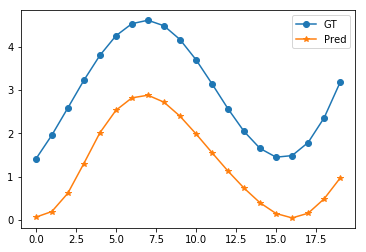

In [509]:
X, y = get_pair(20)
y_hat = model.predict(X)
plt.plot(y[0, :, 0], marker='o', label='GT')
plt.plot(y_hat[0, :, 0], marker='*', label='Pred')
#plt.plot(X.flatten(), marker='^',label='Input')
plt.legend()

In [463]:
import matplotlib.pyplot as plt
for _ in range(1):
    X,y = get_pair(n_timesteps_in, n_timesteps_out, 10)
    yhat = model.predict(X, verbose=0)
    plt.plot(y.flatten(),'ko')
    plt.plot(yhat.flatten(),'b.')

TypeError: get_pair() takes from 0 to 1 positional arguments but 3 were given

In [216]:
print('Accuracy: %.2f%%' % (float(correct)/float(total)*100.0))
# spot check some examples
for _ in range(10):
    X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
    yhat = model.predict(X, verbose=0)
    print('Expected:', one_hot_decode(y[0]), 'Predicted', one_hot_decode(yhat[0]))

Accuracy: 0.00%
Expected: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] Predicted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Expected: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] Predicted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Expected: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] Predicted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Expected: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] Predicted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Expected: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] Predicted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Expected: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] Predicted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Expected: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] Predicted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,